In [1]:
import pandas as pd
import numpy as np

In [2]:
passenger_df = pd.read_csv("airline-passengers.csv")
passenger_df

,Date,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
type(passenger_df["Date"][0])

str

In [4]:
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])

In [5]:
type(passenger_df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
passenger_df["month"] = passenger_df["Date"].dt.month
passenger_df["day"] = passenger_df["Date"].dt.day
passenger_df["day_name"] = passenger_df["Date"].dt.day_name()
passenger_df.head()

,Date,#Passengers,month,day,day_name
0,1949-01-01,112,1,1,Saturday
1,1949-02-01,118,2,1,Tuesday
2,1949-03-01,132,3,1,Tuesday
3,1949-04-01,129,4,1,Friday
4,1949-05-01,121,5,1,Sunday


In [8]:
passenger_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("sum")
passenger_per_month = passenger_per_month.reset_index()
passenger_per_month

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262
5,6,3740
6,7,4216
7,8,4213
8,9,3629
9,10,3199


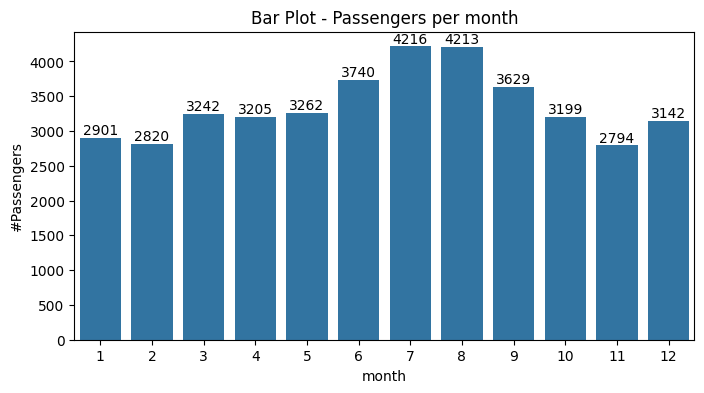

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

ax = sns.barplot(x="month", y="#Passengers",data=passenger_per_month)
ax.set_title("Bar Plot - Passengers per month")

for p,v in zip(ax.patches, passenger_per_month["#Passengers"]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width() / 2, height + 5, v,
            ha = 'center', va='bottom')

plt.show()

In [10]:
mean_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("mean").reset_index()
mean_passengers_per_month

,month,#Passengers
0,1,241.750000
1,2,235.000000
2,3,270.166667
3,4,267.083333
4,5,271.833333
5,6,311.666667
6,7,351.333333
7,8,351.083333
8,9,302.416667
9,10,266.583333


In [11]:
median_passengers_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("median").reset_index()
median_passengers_per_month

,month,#Passengers
0,1,223.0
1,2,214.5
2,3,251.5
3,4,252.0
4,5,252.0
5,6,289.5
6,7,333.0
7,8,320.0
8,9,285.5
9,10,251.5


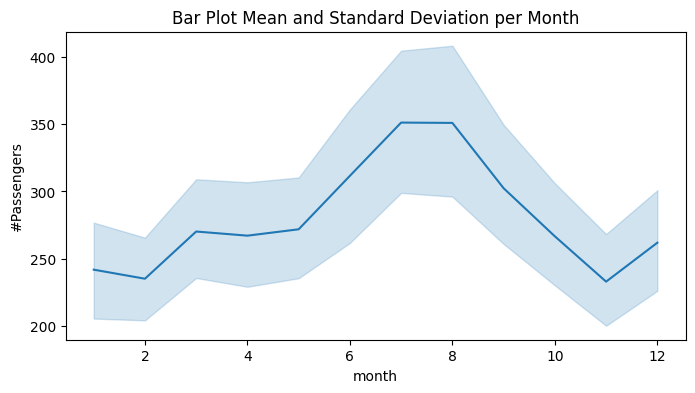

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

ax = sns.lineplot(x="month",y="#Passengers",data=passenger_df,errorbar=('ci',80))
ax.set_title("Bar Plot Mean and Standard Deviation per Month")
plt.show()

In [14]:
import pandas as pd
import numpy as np

passenger_df = pd.read_csv("airline-passengers.csv")
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"])

passenger_df['mean'] = passenger_df['#Passengers'].mean()
passenger_df['std'] = passenger_df['#Passengers'].std()

passenger_df['zscore'] = (passenger_df['#Passengers'] - passenger_df['mean'])/passenger_df['std']

passenger_df['zscore_abs'] = abs(passenger_df['zscore'])

passenger_df.sort_values(by='zscore_abs',ascending=False).head(100)

,Date,#Passengers,mean,std,zscore,zscore_abs
138,1960-07-01,622,280.298611,119.966317,2.848311,2.848311
139,1960-08-01,606,280.298611,119.966317,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164
126,1959-07-01,548,280.298611,119.966317,2.231471,2.231471
137,1960-06-01,535,280.298611,119.966317,2.123108,2.123108
...,...,...,...,...,...,...
111,1958-04-01,348,280.298611,119.966317,0.564337,0.564337
105,1957-10-01,347,280.298611,119.966317,0.556001,0.556001
79,1955-08-01,347,280.298611,119.966317,0.556001,0.556001
41,1952-06-01,218,280.298611,119.966317,-0.519301,0.519301


In [15]:
anamlous_df_high = passenger_df.sort_values(by='zscore',ascending=False).head(10)
anamlous_df_high["Date"] = pd.to_datetime(anamlous_df_high["Date"])
anamlous_df_low = passenger_df.sort_values(by="zscore",ascending=True).head(10)
anamlous_df_low["Date"] = pd.to_datetime(anamlous_df_low["Date"])

In [16]:
anamlous_df_high

,Date,#Passengers,mean,std,zscore,zscore_abs
138,1960-07-01,622,280.298611,119.966317,2.848311,2.848311
139,1960-08-01,606,280.298611,119.966317,2.714940,2.714940
127,1959-08-01,559,280.298611,119.966317,2.323164,2.323164
126,1959-07-01,548,280.298611,119.966317,2.231471,2.231471
137,1960-06-01,535,280.298611,119.966317,2.123108,2.123108
140,1960-09-01,508,280.298611,119.966317,1.898044,1.898044
115,1958-08-01,505,280.298611,119.966317,1.873037,1.873037
114,1958-07-01,491,280.298611,119.966317,1.756338,1.756338
136,1960-05-01,472,280.298611,119.966317,1.597960,1.597960
125,1959-06-01,472,280.298611,119.966317,1.597960,1.597960


In [17]:
anamlous_df_low

,Date,#Passengers,mean,std,zscore,zscore_abs
10,1949-11-01,104,280.298611,119.966317,-1.469568,1.469568
0,1949-01-01,112,280.298611,119.966317,-1.402882,1.402882
22,1950-11-01,114,280.298611,119.966317,-1.386211,1.386211
12,1950-01-01,115,280.298611,119.966317,-1.377875,1.377875
1,1949-02-01,118,280.298611,119.966317,-1.352868,1.352868
11,1949-12-01,118,280.298611,119.966317,-1.352868,1.352868
9,1949-10-01,119,280.298611,119.966317,-1.344532,1.344532
4,1949-05-01,121,280.298611,119.966317,-1.327861,1.327861
16,1950-05-01,125,280.298611,119.966317,-1.294518,1.294518
13,1950-02-01,126,280.298611,119.966317,-1.286183,1.286183


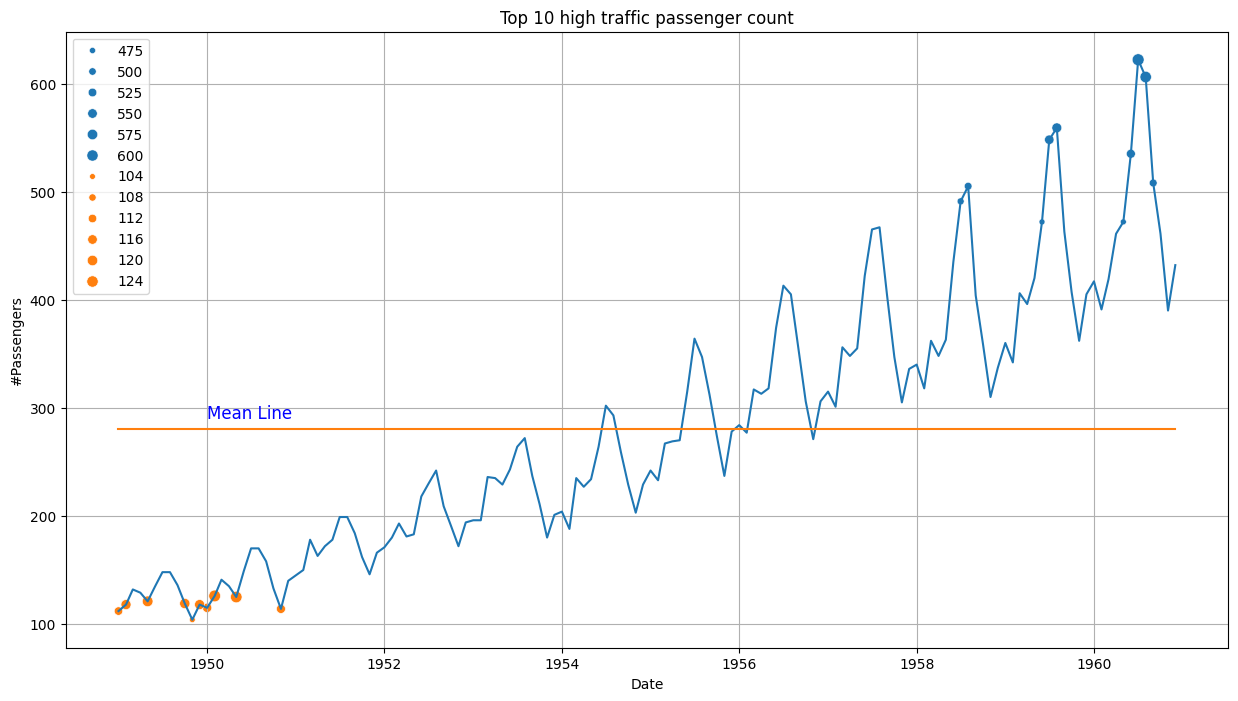

In [21]:
plt.figure(figsize=(15,8))
plt.grid=True
plt.title("Top 10 high traffic passenger count")

ax = sns.lineplot(x="Date", y="#Passengers", data=passenger_df)        #line
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_high, size="#Passengers")   #scatter high outliers
ax = sns.scatterplot(x="Date",y="#Passengers", data=anamlous_df_low, size="#Passengers")    #scatter low outliers
ax = sns.lineplot(x="Date", y="mean", data=passenger_df)               #mean line

ax.text(pd.to_datetime("1950"), 290, "Mean Line",
            horizontalalignment='left', size='large', color='Blue')

ax.grid()